#Import Libraries

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [0]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_path = pathlib.Path('/content/furniture')
class_name = np.array(['bed', 'sofa', 'fireplace', 'chair', 'floor lamp', 'dressing table', 'curtain','table','entertainment center','bookshelves'])
#class_name = np.array([item.name for item in data_path.glob('*')])
#print(class_name)

# Load Function

In [0]:
def plot_loss():

    loss = history.history['loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 1, 1)
    plt.title('Validation Loss & Training Loss')
    plt.semilogy(epochs, history.history['val_loss'], 'b', label='CNN')
    plt.semilogy(epochs, history.history['loss'], 'b', label='CNN')
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #plt.ylim([0.0, 0.6])
    plt.legend(loc='best')

    plt.show()

def plot_acc():

    loss = history.history['loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(10, 10))
    plt.subplot(1,1,1)
    plt.title('Validation Accuray & Training Accuracy')
    plt.semilogy(epochs, history.history['val_accuracy'], 'b', label='CNN')
    plt.semilogy(epochs, history.history['accuracy'], 'b', label='CNN')
    plt.grid(True)
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 0.9])
    plt.legend(loc='best')
    plt.show()

In [0]:
def generate_data(data_path, img_size=224, batch_n=180):

    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                #width_shift_range=0.2,
                                #height_shift_range=0.2,
                                #horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)
    
    train_data_generate = image_generator.flow_from_directory(
                                directory=str(data_path),
                                batch_size=batch_n,
                                shuffle=True,
                                target_size=(img_size, img_size),
                                classes = list(class_name),
                                subset='training')
    
    test_data_generate = image_generator.flow_from_directory(
                                directory=str(data_path),
                                batch_size=batch_n,
                                shuffle=True,
                                target_size=(img_size, img_size),
                                classes = list(class_name),
                                subset='validation')
    
    return train_data_generate, test_data_generate


In [0]:
def room_data(data_path, img_size=224, batch_n=180) :
  image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
  room_data_generate = image_generator.flow_from_directory(
      directory='/content/room',
      batch_size=batch_n,
      shuffle=True,
      target_size=(img_size, img_size),
      )
  return room_data_generate

# Prepare Data

- **Unzip Data**

In [0]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture
!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/room.zip -d /content

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
replace /content/furniture/bed/bed (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furni

#ImageGenerator

In [0]:
img_size =  224
batch_n = 150

data_path = pathlib.Path('/content/furniture')
train_data_generate, test_data_generate = generate_data(data_path, img_size, batch_n)

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


#Model 

### 모델 설계한 부분입니다. 
### 실제 predict는 load한 모델로 진행하였습니다.

import model

In [0]:
import tensorflow.keras.applications.inception_v3 as incep

model_incep = incep.InceptionV3(
    weights="imagenet", 
    #include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
)

model_incep.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

##fine tuning

In [0]:
epoch_n = 100

make ai-kea model

In [0]:
#inputs = model_incep.inputs
#print(inputs[0])
inputs = model_incep.get_layer('mixed7').output
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', name='conv_feat')(inputs) 
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_fddea')(x) 
x = tf.keras.layers.BatchNormalization(momentum=0.85)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

aikea_model = tf.keras.Model(inputs=model_incep.inputs, outputs=outputs, name='grad_model')

aikea_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

aikea_model.summary()

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

## Training

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint as mcp

epoch_n = 1
img_size = 224
batch_n = 150
data_path = pathlib.Path('/content/furniture')

train_data_generate, test_data_generate = generate_data(data_path, img_size, batch_n)

checkpoint = mcp('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/googlenet_master_00_master.h5',
                 monitor="val_accuracy", mode="max",
                 save_best_only=True)

history = prev_ai_kea.fit_generator(
                train_data_generate,
                epochs = epoch_n,
                validation_data = test_data_generate,
                callbacks=[checkpoint,])

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 84 steps, validate for 21 steps
84/84 [==============================] - 237s 3s/step - loss: 0.1532 - accuracy: 0.9543 - val_loss: 1.5225 - val_accuracy: 0.6868


In [0]:
# aikea_day2_20_GoogLeNet_00
def save_model(date, epoch, model_name, num):
    prev_ai_kea.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

save_model("day2", 20, "GoogLeNet", "00-1")

In [0]:
aikea_model.fit_generator(
    train_data_generate,
    epochs = epoch_n,
    validation_data = test_data_generate
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 70 steps, validate for 18 steps
Epoch 1/100
70/70 [==============================] - 318s 5s/step - loss: 0.7883 - accuracy: 0.7696 - val_loss: 1.5609 - val_accuracy: 0.4928
Epoch 2/100
70/70 [==============================] - 298s 4s/step - loss: 0.3589 - accuracy: 0.8908 - val_loss: 0.8091 - val_accuracy: 0.7754
Epoch 3/100
70/70 [==============================] - 295s 4s/step - loss: 0.2745 - accuracy: 0.9162 - val_loss: 1.6541 - val_accuracy: 0.6469
Epoch 4/100
70/70 [==============================] - 293s 4s/step - loss: 0.2469 - accuracy: 0.9262 - val_loss: 1.6188 - val_accuracy: 0.6236
Epoch 5/100
70/70 [==============================] - 292s 4s/step - loss: 0.1941 - accuracy: 0.9393 - val_loss: 0.9629 - val_accuracy: 0.7391
Epoch 6/100
70/70 [==============================] - 291s 4s/step - loss: 0.1795 - accuracy: 0.9438 - val_loss: 1.2562 - v

KeyboardInterrupt: ignored

In [0]:
grad_model = tf.keras.models.Model(
    [model_incep.inputs],                           # input: vgg16 inputs
    [aikea_model.get_layer('conv_fddea').output,  # outputs: vgg16 last conv
     aikea_model.output]                           # softmax out
)
print(grad_model)

In [0]:
plot_loss()

In [0]:
plot_acc()

# Load Prev Model

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'

In [0]:
def load_models(date, epoch, model_name, num):
  model = tf.keras.models.load_model(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))
  return model

In [0]:
#prev_ai_kea = load_models("day2", 20, "GoogLeNet", "00")
prev_ai_kea = tf.keras.models.load_model(save_path + "googlenet_master_00_lsy1.h5")

In [0]:
prev_ai_kea.summary()

prev_ai_kea.get_layer('mixed7').output

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

<tf.Tensor 'mixed7/Identity:0' shape=(None, 12, 12, 768) dtype=float32>

# PLOT LEARNING

In [0]:
print(np.max(history.history['val_accuracy']))

0.68676233


In [0]:
plot_loss()

NameError: ignored

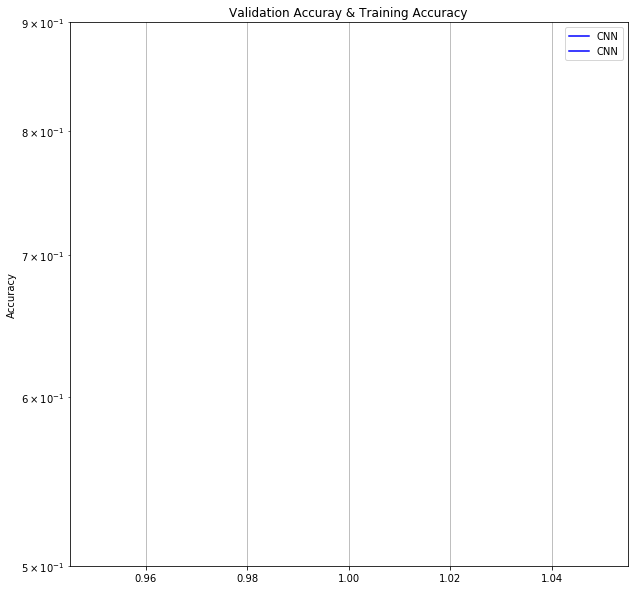

In [0]:
plot_acc()

# CAM

In [0]:
import cv2
import matplotlib.patches as patches
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.inception_v3 as incep

def buildCAM(img_path, img_alpha, heatmap_alpha, aikea_model=prev_ai_kea): # 0<= alpha <=1

    # load the image with the required shape
    img = image.load_img(img_path, target_size=(img_size, img_size))
    # check image
    plt.imshow(img)
    # convert the image to an array
    img = image.img_to_array(img)         # tf.keras.processing
    # expand dimensions so that it represents a single 'sample'
    img = np.expand_dims(img, axis=0)     # numpy
    # prepare the image (e.g. scale pixel values for the vgg)
    img = incep.preprocess_input(img)     # VGG16.preprocess_input

    grad_model = tf.keras.models.Model(
        [aikea_model.inputs],                           # input: vgg16 inputs
        [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
        aikea_model.output]                           # softmax out
    )

    # GradientTape 설정
    with tf.GradientTape() as tape:
        conv_outputs, predict = grad_model(img)   # feature, predict
        class_out = predict[:, np.argmax(predict[0])]    # class     
    print(predict[0])

    # feature map
    output = conv_outputs[0]

    # Get gradient for input image
    grads = tape.gradient(class_out, conv_outputs)[0]

    # check grads' shape
    print('grads', grads.shape, output.shape)

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))

    
    # Build a map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        print(w)
        cam += w * output[:, :, index]

    # check cam shape
    print('cam', cam.shape, weights.shape)
    print(cam)


    # image read: ndarray type
    img = cv2.imread(img_path)
    # GBR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

    plt.imshow(img)

    print('img', img.shape, type(img))


    # resize cam
    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
    # heatmap : minmax normalized one
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    # convert heatmap to rgb
    heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB
    
    # get heatmap outline
    heatlist = heatmap.tolist()
    t_pos = []
    for i in range(len(heatlist)):
      for j in range(len(heatlist[i])):
        if heatlist[i][j][2]<200: t_pos.append((i, j))

    y_max = max([i[0] for i in t_pos])
    y_min = min([i[0] for i in t_pos])
    x_max = max([i[1] for i in t_pos])
    x_min = min([i[1] for i in t_pos])

    # check heatmap shape
    plt.imshow(heatmap)
    heatmap.shape #(426, 640, 3)

    # blending heatmap: image: 100%, heatmap: 50%
    output_image = cv2.addWeighted(img.astype('uint8'), img_alpha,  # 1: 100%
                                  heatmap, heatmap_alpha,            # 0.5: 50%
                                  0)
    
    
    return predict[0], output_image, y_min, x_min, (y_max-y_min), (x_max-x_min)

Using TensorFlow backend.


In [0]:
img_path = '/content/furniture/floor lamp/floor_lamp (11).jpg'

tf.Tensor(
[1.6770851e-07 3.0589780e-07 1.4922856e-06 1.5418562e-05 9.9996901e-01
 1.6883595e-06 3.8786629e-07 1.0545959e-05 6.4052102e-07 3.5197843e-07], shape=(10,), dtype=float32)
grads (12, 12, 256) (12, 12, 256)
tf.Tensor(1.0797513e-09, shape=(), dtype=float32)
tf.Tensor(1.3481027e-09, shape=(), dtype=float32)
tf.Tensor(1.0793245e-08, shape=(), dtype=float32)
tf.Tensor(9.402372e-10, shape=(), dtype=float32)
tf.Tensor(2.9398062e-09, shape=(), dtype=float32)
tf.Tensor(-1.1126428e-08, shape=(), dtype=float32)
tf.Tensor(-2.293791e-09, shape=(), dtype=float32)
tf.Tensor(-2.2892301e-08, shape=(), dtype=float32)
tf.Tensor(3.7457534e-10, shape=(), dtype=float32)
tf.Tensor(-5.572497e-09, shape=(), dtype=float32)
tf.Tensor(5.9283676e-09, shape=(), dtype=float32)
tf.Tensor(2.9549223e-09, shape=(), dtype=float32)
tf.Tensor(-8.4875e-09, shape=(), dtype=float32)
tf.Tensor(-1.3328768e-08, shape=(), dtype=float32)
tf.Tensor(3.2900214e-09, shape=(), dtype=float32)
tf.Tensor(2.384108e-09, shape=(),

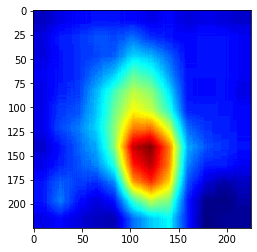

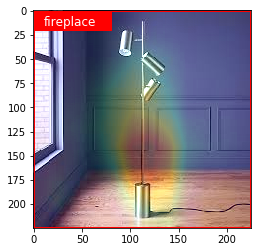

In [0]:
import cv2
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# define Model
pred_list=[]
pred_list, output_image, yy, xx, h, w = buildCAM(img_path, 1, 0.2)
pred_cls = class_name[np.argmax(pred_list)]
print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

answer :  [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[9985426, 33, 3, 13, 1, 13947, 17, 473, 78, 5]
0
bed
dressing table
table
entertainment center
sofa


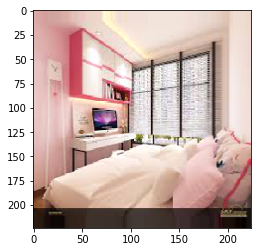

In [0]:
image, answer = test_data_generate.next()
predict = prev_ai_kea.predict(image) # model_basic 수정

print('answer : ', answer)
plt.imshow(image[0])
print([ int(i * 10000000) for i in predict[0] ])
print(np.argsort(predict[0])[-1])
print(class_name[np.argsort(predict[0])[-1]])
print(class_name[np.argsort(predict[0])[-2]])
print(class_name[np.argsort(predict[0])[-3]])
print(class_name[np.argsort(predict[0])[-4]])
print(class_name[np.argsort(predict[0])[-5]])

answer :  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[0, 0, 0, 0, 0, 0, 0, 10000000, 0, 0]
7
table
chair
sofa
bed
dressing table


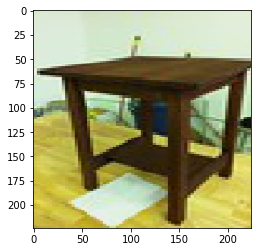

In [0]:
image, answer = test_data_generate.next()
predict = prev_ai_kea.predict(image) # model_basic 수정

print('answer : ', answer)
plt.imshow(image[0])
print([ int(i * 10000000) for i in predict[0] ])
print(np.argsort(predict[0])[-1])
print(class_name[np.argsort(predict[0])[-1]])
print(class_name[np.argsort(predict[0])[-2]])
print(class_name[np.argsort(predict[0])[-3]])
print(class_name[np.argsort(predict[0])[-4]])
print(class_name[np.argsort(predict[0])[-5]])

# Use Room Data

In [0]:
room_data_generate = room_data('/content/room', 224, 150)

Found 928 images belonging to 2 classes.


In [0]:
from scipy import ndimage
from skimage.measure import regionprops
import tensorflow.keras.applications.inception_v3 as incep

def generate_bbox(cam, threshold):
    labeled, _ = ndimage.label(cam > threshold)
    props = regionprops(labeled)
    return props

In [0]:
def buildCAM_mul(index, img_path, img_alpha, heatmap_alpha, aikea_model=prev_ai_kea): # 0<= alpha <=1
    
    ##idx 
    idx = -index
    # load the image with the required shape
    img = image.load_img(img_path, target_size=(img_size, img_size))
    #img = test_image_generated[0]

    # check image
    plt.imshow(img)
    # convert the image to an array
    img = image.img_to_array(img)         # tf.keras.processing
    # expand dimensions so that it represents a single 'sample'
    img = np.expand_dims(img, axis=0)     # numpy
    # prepare the image (e.g. scale pixel values for the vgg)
    img = incep.preprocess_input(img)     # VGG16.preprocess_input

    grad_model = tf.keras.models.Model(
        [aikea_model.inputs],                           # input: vgg16 inputs
        [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
        aikea_model.output]                           # softmax out
    )

    # GradientTape 설정
    with tf.GradientTape() as tape:
        conv_outputs, predict = grad_model(img)   # feature, predict
        class_out = predict[:, np.argsort(predict[0])[idx]]    # class     
    # print(predict[0])

    # feature map
    output = conv_outputs[0]

    # Get gradient for input image
    grads = tape.gradient(class_out, conv_outputs)[0]

    # check grads' shape
    # print('grads', grads.shape, output.shape)

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))

    
    # Build a map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        # print(w)
        cam += w * output[:, :, index]

    # check cam shape
    #print('cam', cam.shape, weights.shape)
    #print(cam)

    # image read: ndarray type
    img = cv2.imread(img_path)
    #img = cv2.imread(test_image_generated[0])

    # GBR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

    # resize cam
    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
    # heatmap : minmax normalized one
    heatmap_1 = (cam - cam.min()) / (cam.max() - cam.min())

    # convert heatmap to rgb
    heatmap = np.uint8(255 * heatmap_1)                       # RGB range (0~255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB
    
    # get heatmap outline
    heatlist = heatmap.tolist()
    t_pos = []
    for i in range(len(heatlist)):
      for j in range(len(heatlist[i])):
        if heatlist[i][j][2]<200: t_pos.append((i, j))

    y_max = max([i[0] for i in t_pos])
    y_min = min([i[0] for i in t_pos])
    x_max = max([i[1] for i in t_pos])
    x_min = min([i[1] for i in t_pos])

    # check heatmap shape
    plt.imshow(heatmap)
    heatmap.shape #(426, 640, 3)

    # blending heatmap: image: 100%, heatmap: 50%
    output_image = cv2.addWeighted(img.astype('uint8'), img_alpha,  # 1: 100%
                                  heatmap, heatmap_alpha,            # 0.5: 50%
                                  0)
    
    
    props = generate_bbox(heatmap_1, 0.7)
    print(props)
    for b in props:
        bbox = b.bbox
        xs = bbox[1]
        ys = bbox[0]
        w = bbox[3] - bbox[1]
        h = bbox[2] - bbox[0]
    
    #return np.argsort(predict[0]), output_image, y_min, x_min, (y_max-y_min), (x_max-x_min)
    return np.argsort(predict[0]), output_image, ys, xs, h, w, img

<class 'numpy.ndarray'>
[4229, 99069631, 2, 6892, 12555, 10759, 883474, 12280, 37, 122]
['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']
[2 8 9 0 3 5 7 4 6 1]
frst : sofa(1, 99069631)
second : curtain(6, 883474)
third : floor lamp(4, 12555)
fourth : table(7, 12280)
fifth : dressing table(5, 10759)


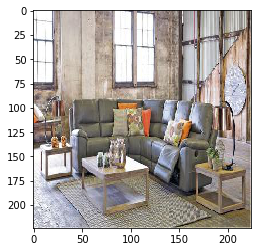

In [0]:
test_image_generated, answer = room_data_generate.next()
print(type(test_image_generated))
predict = prev_ai_kea.predict(test_image_generated) # model_basic 수정
arr = np.argsort(predict[0])
pred_res = [ int(i * 100000000) for i in predict[0] ]
plt.imshow(test_image_generated[0])

print(pred_res)
print(class_name)
print(arr)
print(f'frst : {class_name[arr[-1]]}({arr[-1]}, {pred_res[arr[-1]]})',
      f'second : {class_name[arr[-2]]}({arr[-2]}, {pred_res[arr[-2]]})',
      f'third : {class_name[arr[-3]]}({arr[-3]}, {pred_res[arr[-3]]})', 
      f'fourth : {class_name[arr[-4]]}({arr[-4]}, {pred_res[arr[-4]]})', 
      f'fifth : {class_name[arr[-5]]}({arr[-5]}, {pred_res[arr[-5]]})', sep='\n')

## Legend
- 0 : 'bed'
- 1 : 'sofa'
- 2 : 'fireplace'
- 3 : 'chair'
- 4 : 'floor lamp'
- 5 : 'dressing table'
- 6 : 'curtain'
- 7 : 'table'
- 8 : 'entertainment center'
- 9 : 'bookshelves'

In [0]:
import matplotlib

img_path = ('/content/test_img.jpg')
matplotlib.image.imsave(img_path, test_image_generated[0])

[<skimage.measure._regionprops._RegionProperties object at 0x7f6ebff20e48>, <skimage.measure._regionprops._RegionProperties object at 0x7f6ebff20dd8>]
185 0 213 43 28 43
(1, 224, 224, 3)



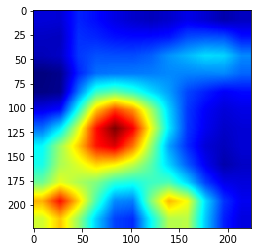

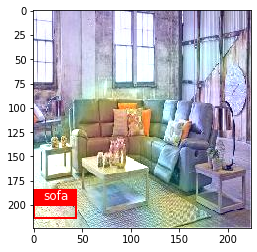

In [0]:
import cv2
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# define Model
pred_list, output_image, yy, xx, h, w, ori_img = buildCAM_mul(1, img_path, 1, 0.2)
pred_cls = class_name[arr[-1]]
#print(pred_list)
#print(pred_cls)
print(yy, xx, yy+h, xx+w, h, w)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), w, 15, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+10, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

y_end = min(yy+h+9, 214)
x_end = min(xx+w+9, 214)
for i in range(yy, y_end, 10) :
  for j in range(xx, x_end, 10) :
    r = ori_img[i:i+10, j:j+10, 0].reshape(-1)
    g = ori_img[i:i+10, j:j+10, 1].reshape(-1)
    b = ori_img[i:i+10, j:j+10, 2].reshape(-1)
    new_color = np.array([int(r.mean()), int(g.mean()), int(b.mean())])

    for y in range(i, i+10) :
      for x in range(j, j+10) :
        ori_img[y][x] = np.array([0,0,0]) #new_color #

next_predict_img = np.array([ori_img,])/255.
print(next_predict_img.shape)
matplotlib.image.imsave(img_path, ori_img)
print()

In [0]:
a = image.load_img('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/test.jpg', target_size=(img_size, img_size))
a = np.array(np.reshape(a, (1, 224, 224, 3)))

b = image.load_img('/content/furniture/chair/chair (26).jpg', target_size=(img_size, img_size))
b = np.array(np.reshape(b, (1, 224, 224, 3))/255.)

[197, 99631929, 0, 909, 2197, 2515, 361586, 642, 4, 9]
['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']
[2 8 9 0 7 3 4 5 6 1]
first : sofa(1, 99631929)
second : curtain(6, 361586)
third : dressing table(5, 2515)
fourth : floor lamp(4, 2197)
fifth : chair(3, 909)


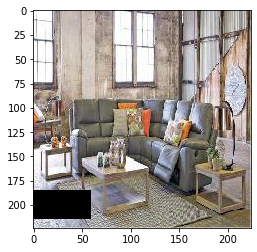

In [0]:
predict_r = prev_ai_kea.predict(next_predict_img) # model_basic 수정
arr = np.argsort(predict_r[0])
pred_res = [ int(i * 100000000) for i in predict_r[0] ]
plt.imshow(next_predict_img[0])

print(pred_res)
print(class_name)
print(arr)
print(f'first : {class_name[arr[-1]]}({arr[-1]}, {pred_res[arr[-1]]})',
      f'second : {class_name[arr[-2]]}({arr[-2]}, {pred_res[arr[-2]]})',
      f'third : {class_name[arr[-3]]}({arr[-3]}, {pred_res[arr[-3]]})', 
      f'fourth : {class_name[arr[-4]]}({arr[-4]}, {pred_res[arr[-4]]})', 
      f'fifth : {class_name[arr[-5]]}({arr[-5]}, {pred_res[arr[-5]]})', sep='\n')

[<skimage.measure._regionprops._RegionProperties object at 0x7f6eca973eb8>, <skimage.measure._regionprops._RegionProperties object at 0x7f6ebfad14a8>]



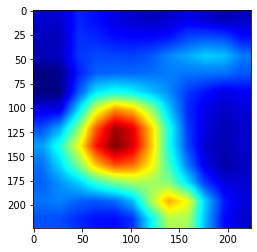

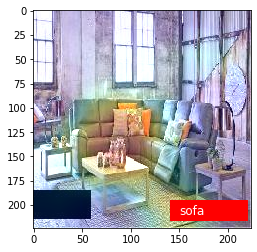

In [0]:
# define Model
pred_list, output_image, yy, xx, h, w, ori_img = buildCAM_mul(1, img_path, 1, 0.2)
pred_cls = class_name[arr[-1]]
#print(pred_list)
#print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

print()

[<skimage.measure._regionprops._RegionProperties object at 0x7f6ecce63978>, <skimage.measure._regionprops._RegionProperties object at 0x7f6ecce63b00>]


ValueError: ignored

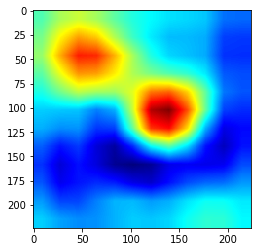

In [0]:
# define Model
pred_list, output_image, yy, xx, h, w = buildCAM_mul(1, img_path, 1, 0.5)
pred_cls = class_name[arr[-1]]
#print(pred_list)
#print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

print()

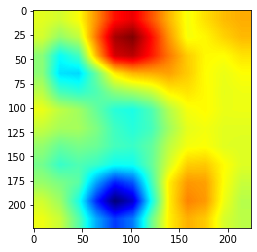

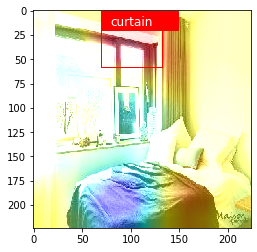

In [0]:
# define Model
pred_list, output_image, yy, xx, h, w = buildCAM_mul(4, img_path, 1, 0.5)
pred_cls = class_name[arr[-4]]
#print(pred_list)
#print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

print()


#image merging

In [0]:
%cd /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/

import mergeImg as mi

/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code


['/content/furniture/curtain/curtain (249).jpg', '/content/furniture/curtain/curtain (193).jpg', '/content/furniture/curtain/curtain (787).jpg', '/content/furniture/curtain/curtain (1085).jpg']
185 199
(370, 199)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
250 199
(500, 199)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
37 100
(74, 100)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
100 100
(200, 100)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
185 183
(370, 183)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
250 183
(500, 183)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
37 100
(74, 100)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
100 1

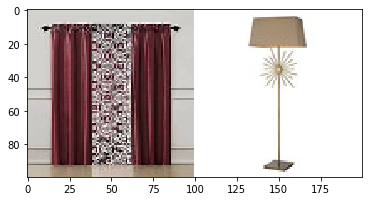

In [0]:
mi.imageMerge('/content/furniture/curtain', '/content/furniture/floor lamp')

In [0]:
from random import randint
import cv2
import matplotlib
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

ppath = pathlib.Path('/content/furniture/curtain_floor lamp/')

10


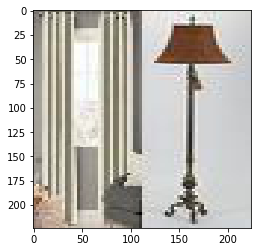

In [0]:
idx = randint(0, 16)
b = image.load_img((str(ppath) + '/curtain_floor lamp_{}.jpg'.format(idx)), target_size=(img_size, img_size))
print(idx)
plt.imshow(b)
b = np.array(np.reshape(b, (1, 224, 224, 3))/255.)
img_path = ('/content/test_img.jpg')
matplotlib.image.imsave(img_path, b[0])

[9, 6, 58, 75, 752844, 240, 99246686, 76, 1, 0]
['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']
[9 8 1 0 2 3 7 5 4 6]
first : curtain(6, 99246686)
second : floor lamp(4, 752844)
third : dressing table(5, 240)
fourth : table(7, 76)
fifth : chair(3, 75)


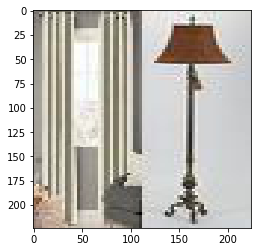

In [0]:
predict_r = prev_ai_kea.predict(b) # model_basic 수정
arr = np.argsort(predict_r[0])
pred_res = [ int(i * 100000000) for i in predict_r[0] ]
plt.imshow(b[0])

print(pred_res)
print(class_name)
print(arr)
print(f'first : {class_name[arr[-1]]}({arr[-1]}, {pred_res[arr[-1]]})',
      f'second : {class_name[arr[-2]]}({arr[-2]}, {pred_res[arr[-2]]})',
      f'third : {class_name[arr[-3]]}({arr[-3]}, {pred_res[arr[-3]]})', 
      f'fourth : {class_name[arr[-4]]}({arr[-4]}, {pred_res[arr[-4]]})', 
      f'fifth : {class_name[arr[-5]]}({arr[-5]}, {pred_res[arr[-5]]})', sep='\n')

(1, 224, 224, 3)



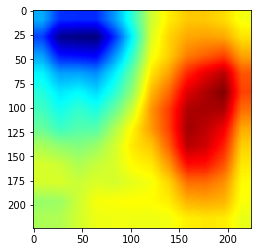

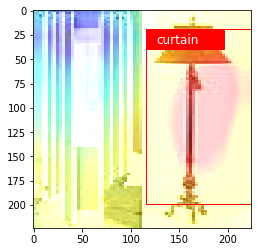

In [0]:
# define Model
pred_list, output_image, yy, xx, h, w, ori_img = buildCAM_mul(1, img_path, 1, 0.5)
pred_cls = class_name[arr[-1]]
#print(pred_list)
#print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)

y_end = min(yy+h+9, 214)
x_end = min(xx+w+9, 214)
for i in range(yy, y_end, 10) :
  for j in range(xx, x_end, 10) :
    r = ori_img[i:i+10, j:j+10, 0].reshape(-1)
    g = ori_img[i:i+10, j:j+10, 1].reshape(-1)
    b = ori_img[i:i+10, j:j+10, 2].reshape(-1)
    new_color = np.array([int(r.mean()), int(g.mean()), int(b.mean())])

    for y in range(i, i+10) :
      for x in range(j, j+10) :
        ori_img[y][x] = new_color #np.array([0,0,0])

next_predict_img = np.array([ori_img,])/255.
print(next_predict_img.shape)
matplotlib.image.imsave(img_path, ori_img)
print()

[32, 23, 216, 14, 3968, 4179, 99991357, 188, 10, 3]
['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']
[9 8 3 1 0 7 2 4 5 6]
first : curtain(6, 99991357)
second : dressing table(5, 4179)
third : floor lamp(4, 3968)
fourth : fireplace(2, 216)
fifth : table(7, 188)


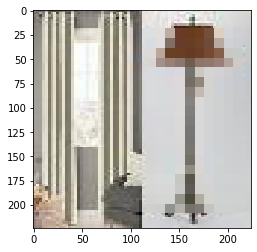

In [0]:
predict_r = prev_ai_kea.predict(next_predict_img) # model_basic 수정
arr = np.argsort(predict_r[0])
pred_res = [ int(i * 100000000) for i in predict_r[0] ]
plt.imshow(next_predict_img[0])

print(pred_res)
print(class_name)
print(arr)
print(f'first : {class_name[arr[-1]]}({arr[-1]}, {pred_res[arr[-1]]})',
      f'second : {class_name[arr[-2]]}({arr[-2]}, {pred_res[arr[-2]]})',
      f'third : {class_name[arr[-3]]}({arr[-3]}, {pred_res[arr[-3]]})', 
      f'fourth : {class_name[arr[-4]]}({arr[-4]}, {pred_res[arr[-4]]})', 
      f'fifth : {class_name[arr[-5]]}({arr[-5]}, {pred_res[arr[-5]]})', sep='\n')

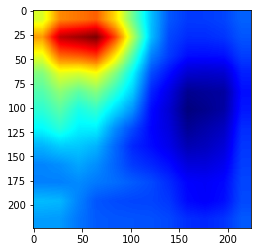

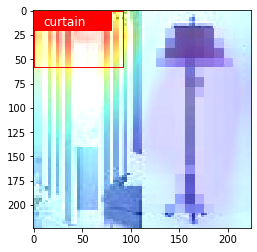

In [0]:
# define Model
pred_list, output_image, yy, xx, h, w, ori_img = buildCAM_mul(1, img_path, 1, 0.5)
pred_cls = class_name[arr[-1]]
#print(pred_list)
#print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)